# Carseats
_Ch 03 - Linear Regression  
Q10 (applied)_

__Description__  
A simulated data set containing sales of child car seats at 400 different stores with 11 variables.

__Source__  
Simulated data.

__References__  
This dataset is a part of the course material of the [book](https://www.statlearning.com/) : ___Introduction to Statistical Learning with R___  

__Short description of variables__  

<b>Sales : </b>Unit sales (in thousands) at each location<br>
<b>CompPrice : </b>Price charged by competitor at each location<br>
<b>Income : </b>Community income level (in thousands of dollars)<br>
<b>Advertising : </b>Local advertising budget for company at each location (in thousands of dollars)<br>
<b>Population : </b>Population size in region (in thousands)<br>
<b>Price : </b>Price company charges for car seats at each site<br>
<b>ShelveLoc : </b>A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site<br>
<b>Age : </b>Average age of the local population<br>
<b>Education : </b>Education level at each location<br>
<b>Urban : </b>A factor with levels No and Yes to indicate whether the store is in an urban or rural location<br>
<b>US : </b>A factor with levels No and Yes to indicate whether the store is in the US or not<br>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

<a id='index'></a>
## Index
- [1) Load packages](#1%29-Load-packages)
- [2) Import data](#2%29-Import-data)
- [a) MLR : Sales ~ Price + Urban + US](#a%29-MLR-:-Sales-~-Price-+-Urban-+-US)
- [b) Coefficient interpretation](#b%29-Coefficient-interpretation)
- [c) Regression equation](#c%29-Regression-equation)
- [d) Statistically significant predictors](#d%29-Statistically-significant-predictors)
- [e) MLR with significant predictors](#e%29-MLR-with-significant-predictors)
- [f) Comparing the models](#f%29-Comparing-the-models)
- [g) Confidence intervals](#g%29-Confidence-intervals)
- [h) Outliers or high leverage observations](#h%29-Outliers-or-high-leverage-observations)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### 1) Load packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

<b><i>Some preliminary workings</i></b>

In [2]:
sns.set_style(rc={'axes.facecolor':'w', 'figure.facecolor':'w'})

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### 2) Import data

In [3]:
fdir = r"E:\Data Science\Statistics\Intro to Statistical Learning with R"
fpath = os.path.join(fdir, 'datasets', 'Carseats.csv')

In [4]:
df = pd.read_csv(fpath)
print(df.shape)
df.head(3)

(400, 11)


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes


#### Check for data integrity

In [5]:
# Check for missing values
df.isna().any().any()

False

In [6]:
# Check for consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Numerical columns have been read as numeric and columns with strings have been read as 'object'. Prima facie, data seems consistent.

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### a) MLR : Sales ~ Price + Urban + US
Fit a multiple regression model to predict Sales using Price, Urban, and US.

<b><i>Cheking out the variables involved</i></b>

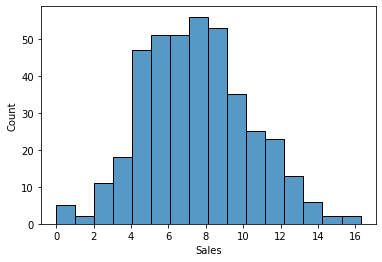

In [7]:
sns.histplot(df.Sales);

In [8]:
df.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [9]:
df.US.value_counts()

Yes    258
No     142
Name: US, dtype: int64

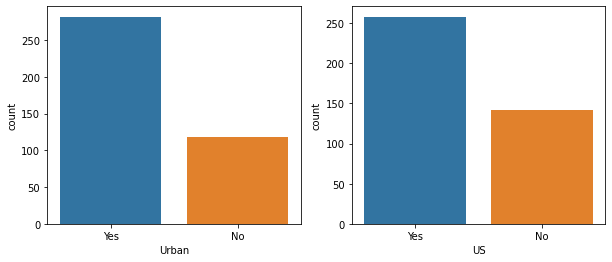

In [10]:
plt.gcf().set_size_inches(10,4)
plt.subplot(121)
sns.countplot(x=df.Urban)
plt.subplot(122)
sns.countplot(x=df.US);

#### mreg1

In [11]:
# MLR
mreg1 = smf.ols('Sales ~ Price + Urban + US', data=df).fit()
mreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.39e-23
Time:                        11:10:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### b) Coefficient interpretation
Provide an interpretation of each coefficient in the model. 
Be careful, some of the variables in the model are qualitative!

<b>Answer:</b><br>

<b>Urban</b> = -0.0219<br>
with a p-value of 0.936, the coefficient is not significant. We conclude that there is no statistical evidence that the location of store being urban has an effect on mean sales.<br>
If the p-value had been below 0.05, the coefficient interpretation would be: If a store is located in an urban area, mean sales is estimated to be lower by 22 units after holding constant the effects of Price and US.

<b>US</b> = 1.201<br>
Holding constant the effects of Price and Urban, Sales of carseats in a US store are estimated to be higher by 1201 units on an average.<br>

<b>Price</b> = -0.0545<br>
USD 1 increase in price, (hoding constant the effect of Urban and US), is estimated to lead to 54 unit decrease in mean sales<br>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### c) Regression equation
Write out the model in equation form, being careful to handle the qualitative variables properly.

<b>Answer:</b><br>

$$\hat{Sales} = \beta_0 + \beta_1 Urban + \beta_2 US + \beta_3 Price$$
$$\hat{Sales} = 13.0435 - 0.0219 \cdot Urban + 1.2006 \cdot US - 0.0545 \cdot Price$$

$$
\begin{align*} 
      Urban=1,\ US=1\ \rightarrow\ & 13.0435 - (0.0219 \cdot 1) + (1.2006 \cdot 1) - 0.0545 \cdot Price\ =\ 14.2222 - 0.0545 \cdot Price \\
      Urban=1,\ US=0\ \rightarrow\ & 13.0435 - (0.0219 \cdot 1) + (1.2006 \cdot 0) - 0.0545 \cdot Price\ =\ 13.0216 - 0.0545 \cdot Price \\
      Urban=0,\ US=1\ \rightarrow\ & 13.0435 - (0.0219 \cdot 0) + (1.2006 \cdot 1) - 0.0545 \cdot Price\ =\ 14.2441 - 0.0545 \cdot Price \\
      Urban=0,\ US=0\ \rightarrow\ & 13.0435 - (0.0219 \cdot 0) + (1.2006 \cdot 0) - 0.0545 \cdot Price\ =\ 13.0435 - 0.0545 \cdot Price \\
\end{align*}
$$

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### d) Statistically significant predictors
For which of the predictors can you reject the null hypothesis $H_0 : \beta_j = 0$ ?

<b>Answer:</b><br>
Presuming level of significance at 5%, $H_0 : \beta_j = 0$ can be rejected for predictors that have a p-value < 0.05.<br>
US and Price have p-values < 0.05.

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### e) MLR with significant predictors
On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [12]:
mreg2 = smf.ols('Sales ~ Price + US', data=df).fit()
mreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           2.66e-24
Time:                        11:10:28   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### f) Comparing the models
How well do the models in (a) and (e) fit the data?

<b>Answer:</b><br>
$R^2$ statistic, the coefficient of determination, is a measure of the variance in response that can be associated with the variance in the predictors in the model. $Adj.\ R^2$ ($\bar{R}^2$) statistic averages the $R^2$ score over the no. of predictors used in the model.<br>

The $R^2$ statistic (0.239) for both models is equivalent. The $\bar{R}^2$ statistic for the second model (0.235) is marginally higher than first's (0.234).<br>
Considering that the second model is more simple as it has fewer predictors and manages to yield an equivalent $R^2$ score, it is considered to be a better fit to the data. Although, both models have very low $R^2$ values and are inadequate.

In [13]:
mreg1.rsquared, mreg1.rsquared_adj

(0.23927539218405525, 0.23351232697332835)

In [14]:
mreg2.rsquared, mreg2.rsquared_adj

(0.23926288842678567, 0.23543045965311715)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### g) Confidence intervals
Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).

In [15]:
mreg2.conf_int(alpha=0.05).rename(index=str, columns={0: "lwr", 1: "upr",})

,lwr,upr
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


The formula for calculation of confidence interval for the coefficient :
$$\hat{\beta}_i\ \pm\ t_{n-2}\ (0.975) \cdot SE(\hat{\beta}_i)$$

where,
$$
SE\left(\hat{\beta}_{0}\right)^{2}=\sigma^{2}\left[\frac{1}{n}+\frac{\bar{x}^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}\right], \quad SE\left(\hat{\beta}_{1}\right)^{2}=\frac{\sigma^{2}}{\sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}}
$$
where $\sigma^{2} = Var(\epsilon)$

In [16]:
# Critical value of t at alpha/2
from scipy.stats import t as tdist
tdist.ppf(0.025, 398)

-1.965942323976193

In [17]:
# Confidence interval calculation
pd.concat([mreg2.params - tdist.ppf(0.975, 398)*mreg2.bse, 
           mreg2.params + tdist.ppf(0.975, 398)*mreg2.bse], axis=1, keys=['lwr','upr'])

,lwr,upr
Intercept,11.790330,14.271256
US[T.Yes],0.691523,1.707762
Price,-0.064760,-0.044196


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### h) Outliers or high leverage observations
Is there evidence of outliers or high leverage observations in the model from (e)?

<b>Answer:</b><br>

<b>Outliers</b><br>
Outliers can be identified using Externally Studentized Residuals. An observation with an esr &gt; 3 in absolute value can be considered an outlier.<br>

<b>Leverage</b><br>
Observations with  $ℎ_{𝑖𝑖}  > 3p/n$ can be considered as having high leverage.<br>

<b>Influential points</b><br>
Cook's distance can help us identify observations that are <b>highly influential</b>. 
Any observation with a CD $\ge$ 1, or a CD substantially larger than others (highly influential data points), requires investigation. A more conservative threshold for flagging observations for examination :
$CooksD \ \ge \frac{4}{N} \ or \ \frac{4}{N−k−1}$ 

##### Function to plot Externally Studentized Residuals vs Fitted Values

In [18]:
# Function to plot Externally Studentized Residuals vs Fitted Values
def esr_plot(fitted_model, plot_dim=(6,4)):
    y_pred = fitted_model.fittedvalues
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external)
    ext_std_resids.index = y_pred.index
    
    f, axs = plt.subplots(1,1, figsize=plot_dim)
    axs.scatter(x=y_pred, y=ext_std_resids, alpha=1, s=15, facecolor='none', 
                     edgecolor='steelblue')
    axs.axhline(y=0, color='k', ls='--', lw=0.3)
    for i in [-3, 3]:
        axs.axhline(y=i, color='r', ls='--', lw=0.5)
    xmin, xmax = axs.get_xlim()
    axs.set_xlim(xmin-((xmax-xmin)/10), xmax+(xmax-xmin)/10)
    axs.set_ylabel('Residuals')
    axs.set_xlabel('Fitted Values')
    for i in ext_std_resids.index[abs(ext_std_resids) > 3]:
        axs.annotate(i, xy=(y_pred[i], ext_std_resids[i]), fontsize=8)
    axs.set_title("Externally Studentized Residual v Fitted Values")
    axs.set_xlabel('Fitted Values')
    axs.set_ylabel('Externally Studentized Residuals')

##### Function to plot Externally Studentized Residuals vs Fitted Values

In [19]:
def lev_plot(fitted_model, plot_dim=(6,4), mark_cd=False):
    y_pred = fitted_model.fittedvalues
    lev = pd.Series(fitted_model.get_influence().hat_matrix_diag, index=y_pred.index)
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external,
                               index=y_pred.index)
    cooks_d = pd.Series(fitted_model.get_influence().cooks_distance[0], index=y_pred.index)
    
    f, axs = plt.subplots(1,1, figsize=plot_dim)
    axs.scatter(x=lev, y=ext_std_resids, alpha=1, s=15, facecolor='none', 
                     edgecolor='steelblue')
    axs.axvline(x=3*(fitted_model.df_model+1)/(fitted_model.df_resid+fitted_model.df_model+1),
                     color='grey', ls='--', lw=0.5)   # 3p/n
    sns.regplot(ax=axs, x=lev, y=ext_std_resids, scatter=False, ci=False, lowess=True,
                line_kws={'color':'r', 'lw':0.5})
    axs.set_title('Externally Studentized Residuals v Leverage')
    axs.set_ylabel('Externally Studentized Residuals')
    axs.set_xlabel('Leverage')
    xmin, xmax = axs.get_xlim()
    axs.set_xlim(-0.001, xmax*1.05)
    if mark_cd:
        top_cd = cooks_d.sort_values(ascending=False)[:3]
        for i in top_cd.index:
            axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)
        notable_cd = cooks_d[cooks_d > 0.5]
        for i in notable_cd.index:
            if cooks_d[i] > 1:
                axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='r')
            else:
                axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='blue')
    else:
        top_lev = lev.sort_values(ascending=False)[:3]
        for i in top_lev.index:
            axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)
        notable_lev = lev[lev > 3*(fitted_model.df_model+1)/fitted_model.resid.shape[0]]
        for i in notable_lev.index:
            if cooks_d[i] > 1:
                axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9, color='r')
            else:
                axs.annotate(i, xy=(lev[i], ext_std_resids[i]), fontsize=9)

##### Function to create influence plots

In [20]:
# Function to create influence plots
def influence_diagnostic_plots(fitted_model):
    y_pred = fitted_model.fittedvalues
    lev = pd.Series(fitted_model.get_influence().hat_matrix_diag, index=y_pred.index)
    ext_std_resids = pd.Series(fitted_model.get_influence().resid_studentized_external,
                               index=y_pred.index)
    cooks_d = pd.Series(fitted_model.get_influence().cooks_distance[0], index=y_pred.index)
    
    cooks_th = 4/fitted_model.df_resid
    gt_cooks_th = cooks_d > cooks_th
    lev_th = 3*(fitted_model.df_model+1) / (fitted_model.df_resid+fitted_model.df_model+1)

    f, axs = plt.subplots(1,2, figsize=(15,4))
    sns.scatterplot(x=lev, y=ext_std_resids, hue=gt_cooks_th, ax=axs[0],
                    palette=['steelblue','green'], legend=False)
    axs[0].set_title("Externally Studentized Residual v Leverage")
    axs[0].set_xlabel('Leverage')
    axs[0].set_ylabel('Externally Studentized Residuals')

    sns.scatterplot(x=lev, y=cooks_d, hue=gt_cooks_th, ax=axs[1],
                    palette=['steelblue','green'], legend=False)
    plt.axhline(y = cooks_th, color='grey', ls='--', lw=0.5)
    plt.axvline(x = lev_th, color='grey', ls='--', lw=0.5)
    marked = [i for i in y_pred.index if (lev[i] >= lev_th) and (cooks_d[i] >= cooks_th)]
    for i in marked:
        plt.annotate(i, xy=(lev[i], cooks_d[i]), fontsize=10)
    axs[1].set_title("Cook's Distance v Leverage")
    axs[1].set_xlabel('Leverage')
    axs[1].set_ylabel("Cook's Distance")

#### Plots

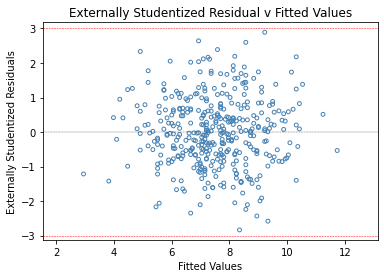

In [21]:
esr_plot(mreg2);

<div class="alert alert-block alert-info">
None of the externally studentized residuals goes beyond the limit of $\pm$ 3 , although a few come close. Prima facie, there are no outliers.
</div>

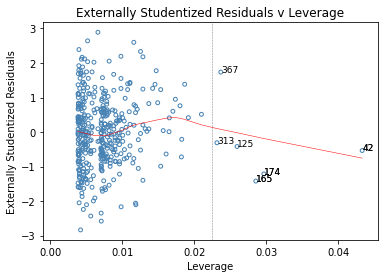

In [22]:
lev_plot(mreg2)

<div class="alert alert-block alert-info">
The average leverage for all the observations is always equal to (p + 1)/n. So if a given observation has a leverage statistic that greatly exceeds (p+1)/n, then we may suspect that the corresponding
point has high leverage.<br>
    
One of 'rule-of-thumb' thresholds for flagging high leverage points is 3p/n.
In the case of the current model, that computes to  
3(2+1)/400 = 0.0225.<br>
The grey line on the above plot represents that threshold. There are 6 points that have $h_{ii}$ values > 0.0225, but none of them have a cook's distance value > 1.
</div>

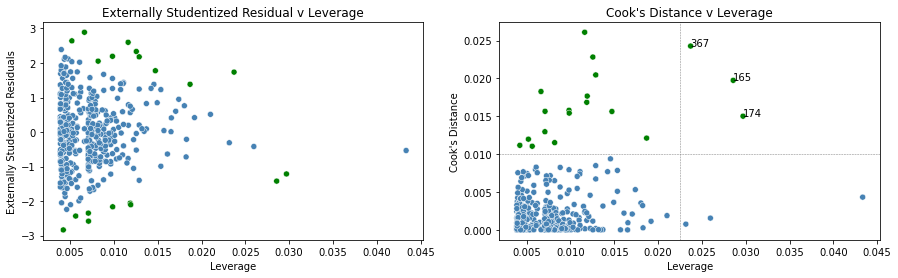

In [23]:
influence_diagnostic_plots(mreg2)

<div class="alert alert-block alert-info">
Observations with Cook's distance > 1 are likely highly influential observations. A more conservative threshold in case of smaller datasets is 4/(N-k-1) which in the case of the current model computes to 4/(400-2-1) = 0.0101. This threshold has been plotted as a grey horizontal line in the right plot above.<br>

In the plots above, the observations with CD > 0.0101 are colored green.<br>

There are 3 observations that have a large $h_{ii}$ value as well as a large CD value and are potentially highly influential for the model. They have been numbered in the right plot above.
</div>

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### References

https://www.kaggle.com/lmorgan95/notebooks  
https://botlnec.github.io/islp/  
https://github.com/a-martyn/ISL-python  
https://onmee.github.io/ISLR-Solutions/  
https://github.com/emredjan/ISL-python  

<table>
<tr style="background-color:white">
    <th><b>-------------------------------------------- &ensp; &nbsp;</b></th>
    <th>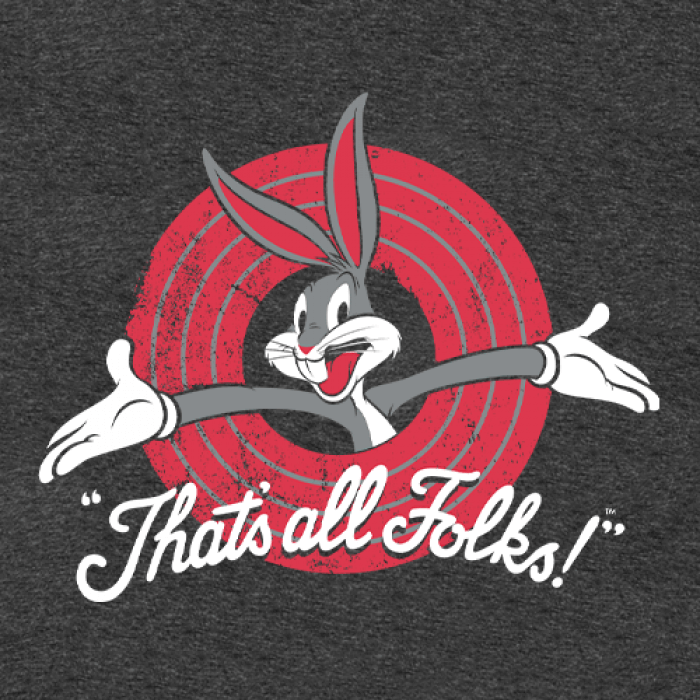</th><th style="float:right"></th>
    <th><b> &ensp;--------------------------------------------</b></th>
</tr>
</table>